### (1)Définition of the problem to solve
#### <font color='green'>According to the features that we have try to predict which which Pokemon could be the winner of the fight.</font>

### (2)Data preparation for Pokedex
#### 
<font color='green'> 
    <ol>
        <li>data structure: A table</li>
        <li>Categorical features: Name, type1, type2, Legendaire</li>
        <li>Ordinal Categorical data: (nombre generations,numero (puisqui'il ya un ordre?)</li>
    </ol>

</font>

### (3)Why do we need to know categorical features?
#### <font color='green'>They are known as classes or labels in the context of attributes or variables which are to be predicted by a model (popularly known as response variables).
</font>


### (4)Which are the data of numercial type?
#### 
<font color='green'> 
    <ol>
        <li>Discrete: All of the features </li>
        <li>Continuous: None</li> 
    </ol>

### (5) Why is it important to specify it?
####  <font color='green'> <p>Numerical data provides an organization with accurate inferences for critical decision-making without any emotional or inaccurate bias.</p><p>Numerical data is analyzed using descriptive and inferential statistical methods, depending on the aim of the research.</p>
</font>

### (6)What should we think of the feature Légendaire?
#### <font color='green'> If the pokemon is légendaire then it's super powerful so we are interested in knowing if by only being légendaire does the pokemon win directly or do we still have to take into account other features
</font>

### (7)How many observations do we have?
#### <font color='green'> we have 800 observations</font>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
pokedex=pd.read_csv('pokedex (1).csv',encoding='ANSI')
pokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,FAUX
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,VRAI
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,VRAI
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,VRAI
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,VRAI


In [2]:
#display the first 10 lines
pokedex[:10]

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,FAUX
5,6,Reptincel,Feu,NaN,58,64,58,80,65,80,1,FAUX
6,7,Dracaufeu,Feu,Vol,78,84,78,109,85,100,1,FAUX
7,8,Mega Dracaufeu X,Feu,Dragon,78,130,111,130,85,100,1,FAUX
8,9,Mega Dracaufeu Y,Feu,Vol,78,104,78,159,115,100,1,FAUX
9,10,Carapuce,Eau,NaN,44,48,65,50,64,43,1,FAUX


In [3]:
#Data type
pokedex.dtypes

NUMERO                      int64
NOM                        object
TYPE_1                     object
TYPE_2                     object
POINTS_DE_VIE               int64
POINTS_ATTAQUE              int64
POINTS_DEFFENCE             int64
POINTS_ATTAQUE_SPECIALE     int64
POINT_DEFENSE_SPECIALE      int64
POINTS_VITESSE              int64
NOMBRE_GENERATIONS          int64
LEGENDAIRE                 object
dtype: object

In [4]:
#Data type
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      799 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   POINTS_ATTAQUE           800 non-null    int64 
 6   POINTS_DEFFENCE          800 non-null    int64 
 7   POINTS_ATTAQUE_SPECIALE  800 non-null    int64 
 8   POINT_DEFENSE_SPECIALE   800 non-null    int64 
 9   POINTS_VITESSE           800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    object
dtypes: int64(8), object(4)
memory usage: 75.1+ KB


In [5]:
#ransformer la feature  𝐿𝑒𝑔𝑒𝑛𝑑𝑎𝑖𝑟𝑒  en entier 0= FAUX et 1=VRAI
pokedex['LEGENDAIRE'].replace({'VRAI':1,'FAUX':0},inplace=True)
pokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1


In [6]:
#is there any missing values?
pokedex.isnull().values.any()

True

In [7]:
#check sum of the missing values and if it's of an importance 
pokedex.isnull().sum()

NUMERO                       0
NOM                          1
TYPE_1                       0
TYPE_2                     387
POINTS_DE_VIE                0
POINTS_ATTAQUE               0
POINTS_DEFFENCE              0
POINTS_ATTAQUE_SPECIALE      0
POINT_DEFENSE_SPECIALE       0
POINTS_VITESSE               0
NOMBRE_GENERATIONS           0
LEGENDAIRE                   0
dtype: int64

In [8]:
#reading combats csv(5000 observations)
combats = pd.read_csv('combats (1).csv')
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [9]:
#Display the first 10 rows 
combats[:10]

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [10]:
combats.dtypes
#all the observations are numeric and continous 

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object

In [11]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [12]:
#checking for null values 
combats.isnull().values.any()

False

In [13]:
#counting number of combats for first pokemons 
S = combats['Second_pokemon'].value_counts()
S

579    88
758    88
47     87
36     86
522    86
       ..
611    45
671    44
709    43
413    40
519    39
Name: Second_pokemon, Length: 784, dtype: int64

In [14]:
#counting number of combats for second pokemons
F=combats['First_pokemon'].value_counts()

In [15]:
#sum of combats 
R=S.add(F)
R=R.reset_index()
R= R.rename({0: 'Combats'}, axis=1)  
R

,index,Combats
0,1,133
1,2,121
2,3,132
3,4,125
4,5,112
...,...,...
779,796,105
780,797,131
781,798,119
782,799,144


In [16]:
#Combats won by each Pokémon
W=combats['Winner'].value_counts()
W=W.reset_index()
W=W.sort_values(["index"])
W=W.reset_index(drop=True)
W

,index,Winner
0,1,37
1,2,46
2,3,89
3,4,70
4,5,55
...,...,...
778,796,39
779,797,116
780,798,60
781,799,89


In [17]:
 #we used to have 784 rows for combats and then we had 783 so there's a pokemon that never won a match we look for it and we added it again
set(R['index']).union(set(W['index']))-set(R['index']).intersection(set(W['index']))

{231}

In [18]:
#adding the 231st pokemon
W.loc[783] = [231,0]
W

W.sort_values(by = 'index', inplace =True)
W=W.reset_index(drop=True)
W

,index,Winner
0,1,37
1,2,46
2,3,89
3,4,70
4,5,55
...,...,...
779,796,39
780,797,116
781,798,60
782,799,89


In [19]:
#merging both R and W dataframes
W['Combats']=R['Combats']
W

,index,Winner,Combats
0,1,37,133
1,2,46,121
2,3,89,132
3,4,70,125
4,5,55,112
...,...,...,...
779,796,39,105
780,797,116,131
781,798,60,119
782,799,89,144


In [20]:
#Change order of columns of W
W=W[["index","Combats","Winner"]]
W

,index,Combats,Winner
0,1,133,37
1,2,121,46
2,3,132,89
3,4,125,70
4,5,112,55
...,...,...,...
779,796,105,39
780,797,131,116
781,798,119,60
782,799,144,89


In [21]:
#changind index column name to numero
W2=W.rename(columns={"index":"NUMERO"})
W2=W2.reset_index(drop=True)
W2

,NUMERO,Combats,Winner
0,1,133,37
1,2,121,46
2,3,132,89
3,4,125,70
4,5,112,55
...,...,...,...
779,796,105,39
780,797,131,116
781,798,119,60
782,799,144,89


In [22]:
#merging pokedex and combats csv
pokedex=pd.merge(pokedex,W2,on="NUMERO",how="outer")
pokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Combats,Winner
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,133.0,37.0
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,121.0,46.0
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,132.0,89.0
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,125.0,70.0
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,112.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,105.0,39.0
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,131.0,116.0
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,119.0,60.0
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,144.0,89.0


In [23]:
#Adding the percentage of the fights won column to the dataframe
Percentage=(pokedex.Winner/pokedex.Combats)*100
pokedex['Percentage']=Percentage
pokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Combats,Winner,Percentage
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,133.0,37.0,27.819549
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,121.0,46.0,38.016529
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,132.0,89.0,67.424242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,125.0,70.0,56.000000
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,112.0,55.0,49.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,105.0,39.0,37.142857
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,131.0,116.0,88.549618
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,119.0,60.0,50.420168
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,144.0,89.0,61.805556


### Description of our observation set

In [24]:
pokedex.describe()

,NUMERO,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Combats,Winner,Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,784.000000,784.000000,784.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,127.551020,63.775510,50.089857
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,11.393236,32.983848,25.545860
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,92.000000,0.000000,0.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,120.000000,36.000000,28.370398
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,128.000000,61.500000,49.090608
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,135.000000,91.000000,71.737440
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,164.000000,152.000000,98.449612


In [25]:
#since TYPE_2 has NA values , replacing them with none to plot a proper graph
pokedex['TYPE_2'] = pokedex['TYPE_2'].fillna('None')
pokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Combats,Winner,Percentage
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,133.0,37.0,27.819549
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,121.0,46.0,38.016529
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,132.0,89.0,67.424242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,125.0,70.0,56.000000
4,5,Salamèche,Feu,None,39,52,43,60,50,65,1,0,112.0,55.0,49.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,105.0,39.0,37.142857
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,131.0,116.0,88.549618
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,119.0,60.0,50.420168
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,144.0,89.0,61.805556


In [28]:
pokedex.isnull().values.any()

True

In [42]:
#Adding the name of the missing pokemon 
pokedex['NOM'][62] = "Colosinge"
pokedex

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2668/616550238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokedex['NOM'][62] = "Colosinge"


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Combats,Winner,Percentage
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,133.0,37.0,27.819549
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,121.0,46.0,38.016529
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,132.0,89.0,67.424242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,125.0,70.0,56.000000
4,5,Salamèche,Feu,None,39,52,43,60,50,65,1,0,112.0,55.0,49.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,105.0,39.0,37.142857
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,131.0,116.0,88.549618
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,119.0,60.0,50.420168
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,144.0,89.0,61.805556


In [43]:
#importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns


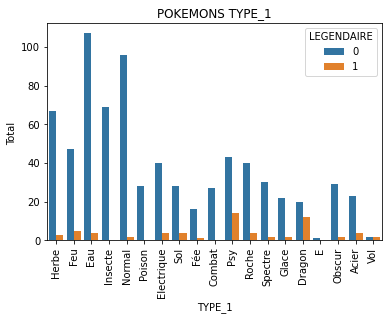

In [44]:
#Visualisation for Pokemons type 1
axe_X = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=pokedex )
plt.xticks(rotation= 90)
plt.xlabel('TYPE_1')
plt.ylabel('Total ')
plt.title("POKEMONS TYPE_1")
plt.show()

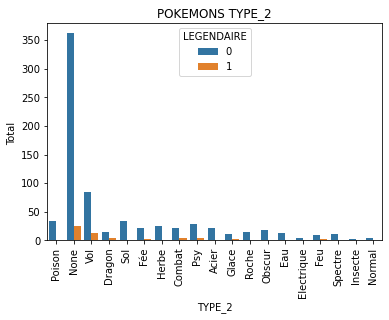

In [33]:
#Visualisation Pokemons type 2
axe_X = sns.countplot(x="TYPE_2", hue="LEGENDAIRE", data=pokedex)
plt.xticks(rotation= 90)
plt.xlabel('TYPE_2')
plt.ylabel('Total ')
plt.title("POKEMONS TYPE_2")
plt.show()

In [34]:
#calculaing winning percentage
t1mean = pokedex.groupby('TYPE_1')[['Percentage']].mean()
t1mean

,Percentage
TYPE_1,
Acier,42.452884
Combat,47.561600
Dragon,63.358734
E,34.375000
Eau,47.052038
Electrique,63.286084
Feu,57.921460
Fée,32.930002
Glace,43.960429


In [35]:
#sort the walues of winning percentage values
t1mean.sort_values(by = ["Percentage"],inplace = True)
t1mean

,Percentage
TYPE_1,
Fée,32.930002
E,34.375000
Roche,40.485183
Acier,42.452884
Insecte,43.254956
Poison,43.326152
Glace,43.960429
Herbe,44.036424
Eau,47.052038


In [37]:
t1mean.reset_index(drop=True)
pokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Combats,Winner,Percentage
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,133.0,37.0,27.819549
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,121.0,46.0,38.016529
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,132.0,89.0,67.424242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,125.0,70.0,56.000000
4,5,Salamèche,Feu,None,39,52,43,60,50,65,1,0,112.0,55.0,49.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,105.0,39.0,37.142857
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,131.0,116.0,88.549618
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,119.0,60.0,50.420168
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,144.0,89.0,61.805556


In [38]:
#Plotting the Heatmap
#creating a new dataframe with all the columns needed or the heatmap
pokeheat = pokedex[['TYPE_1','POINTS_DE_VIE','POINTS_ATTAQUE','POINTS_DEFFENCE','POINTS_ATTAQUE_SPECIALE','POINT_DEFENSE_SPECIALE','POINTS_VITESSE','NOMBRE_GENERATIONS','LEGENDAIRE','Percentage']]
pokeheat

,TYPE_1,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Percentage
0,Herbe,45,49,49,65,65,45,1,0,27.819549
1,Herbe,60,62,63,80,80,60,1,0,38.016529
2,Herbe,80,82,83,100,100,80,1,0,67.424242
3,Herbe,80,100,123,122,120,80,1,0,56.000000
4,Feu,39,52,43,60,50,65,1,0,49.107143
...,...,...,...,...,...,...,...,...,...,...
795,Roche,50,100,150,100,150,50,6,1,37.142857
796,Roche,50,160,110,160,110,110,6,1,88.549618
797,Psy,80,110,60,150,130,70,6,1,50.420168
798,Psy,80,160,60,170,130,80,6,1,61.805556


In [40]:
#Encoding TYPE_1 column
pokeheat = pd.get_dummies(pokeheat)
pokeheat

,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Percentage,TYPE_1_Acier,...,TYPE_1_Herbe,TYPE_1_Insecte,TYPE_1_Normal,TYPE_1_Obscur,TYPE_1_Poison,TYPE_1_Psy,TYPE_1_Roche,TYPE_1_Sol,TYPE_1_Spectre,TYPE_1_Vol
0,45,49,49,65,65,45,1,0,27.819549,0,...,1,0,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,0,38.016529,0,...,1,0,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,0,67.424242,0,...,1,0,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,0,56.000000,0,...,1,0,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,0,49.107143,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,37.142857,0,...,0,0,0,0,0,0,1,0,0,0
796,50,160,110,160,110,110,6,1,88.549618,0,...,0,0,0,0,0,0,1,0,0,0
797,80,110,60,150,130,70,6,1,50.420168,0,...,0,0,0,0,0,1,0,0,0,0
798,80,160,60,170,130,80,6,1,61.805556,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

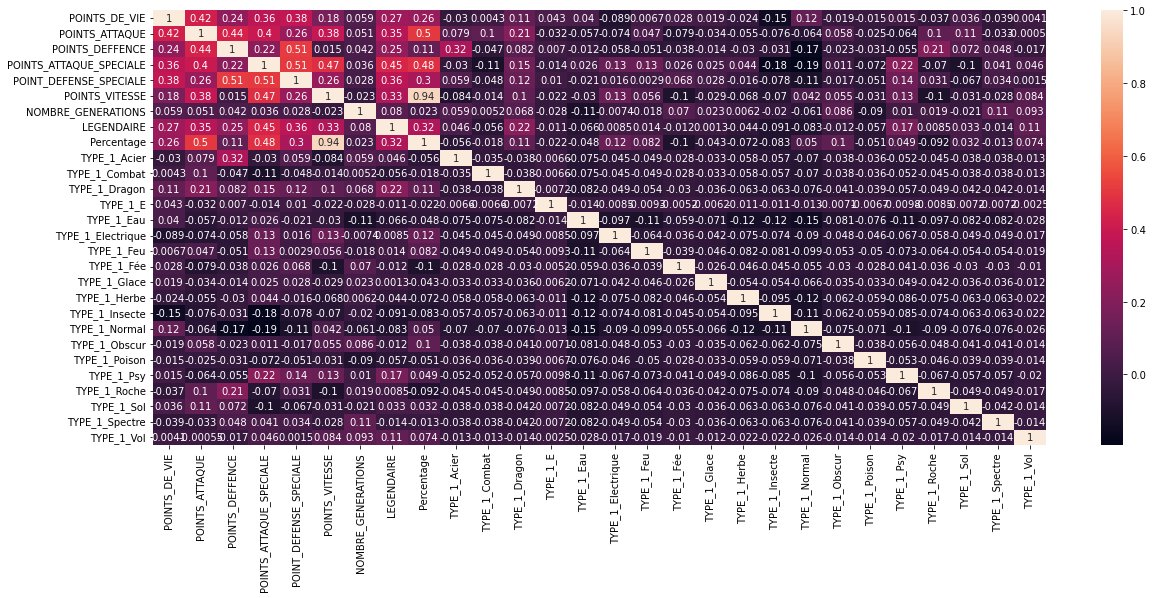

In [41]:
plt.figure(figsize = (20, 8))
sns.heatmap(pokeheat.corr(), annot = True)

### TP_03


In [62]:
pokedex_pred = pokedex
pokedex_pred

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Combats,Winner,Percentage
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,133.0,37.0,27.819549
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,121.0,46.0,38.016529
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,132.0,89.0,67.424242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,125.0,70.0,56.000000
4,5,Salamèche,Feu,None,39,52,43,60,50,65,1,0,112.0,55.0,49.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,105.0,39.0,37.142857
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,131.0,116.0,88.549618
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,119.0,60.0,50.420168
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,144.0,89.0,61.805556


In [63]:
pokedex_pred.drop(columns = "TYPE_2", inplace = True)
pokedex_pred.isnull().sum()

NUMERO                      0
NOM                         0
TYPE_1                      0
POINTS_DE_VIE               0
POINTS_ATTAQUE              0
POINTS_DEFFENCE             0
POINTS_ATTAQUE_SPECIALE     0
POINT_DEFENSE_SPECIALE      0
POINTS_VITESSE              0
NOMBRE_GENERATIONS          0
LEGENDAIRE                  0
Combats                    16
Winner                     16
Percentage                 16
dtype: int64

In [65]:
pokedex_pred.dropna(inplace = True)
pokedex_pred.isnull().sum()

NUMERO                     0
NOM                        0
TYPE_1                     0
POINTS_DE_VIE              0
POINTS_ATTAQUE             0
POINTS_DEFFENCE            0
POINTS_ATTAQUE_SPECIALE    0
POINT_DEFENSE_SPECIALE     0
POINTS_VITESSE             0
NOMBRE_GENERATIONS         0
LEGENDAIRE                 0
Combats                    0
Winner                     0
Percentage                 0
dtype: int64

In [69]:
#X = POINTS_DE_VIE; POINTS_ATTAQUE;POINTS_DEFFENCE;POINTS_ATTAQUE_SPECIALE;POINT_DEFENSE_SPECIALE;POINTS_VITESSE;NOMBRE_GENERATIONS
X = pokedex_pred.iloc[:, 3:10]
X

,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS
0,45,49,49,65,65,45,1
1,60,62,63,80,80,60,1
2,80,82,83,100,100,80,1
3,80,100,123,122,120,80,1
4,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6
796,50,160,110,160,110,110,6
797,80,110,60,150,130,70,6
798,80,160,60,170,130,80,6


In [75]:
y = pokedex_pred.iloc[:, 13:]
y

,Percentage
0,27.819549
1,38.016529
2,67.424242
3,56.000000
4,49.107143
...,...
795,37.142857
796,88.549618
797,50.420168
798,61.805556


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression() 
model_tree = DecisionTreeRegressor()
model_forest = RandomForestRegressor()

In [78]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=3))
print(cross_val_score(model_tree, X, y, cv=3))
print(cross_val_score(model_forest, X, y, cv=3))

[0.92102867 0.86879312 0.91814181]
[0.91412408 0.90728855 0.92491685]


C:\Users\Administrator\miniconda3\envs\ml_and_dl\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\miniconda3\envs\ml_and_dl\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\miniconda3\envs\ml_and_dl\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.94875167 0.94429833 0.95189573]


In [79]:
#Forest
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor()

In [85]:
model_forest.fit(X_Train, Y_Train)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2668/4011338154.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_Train, Y_Train)


RandomForestRegressor()

In [101]:
import pickle
with open("model_forest", "wb")as f:
    pickle.dump(model_forest, f)

In [112]:
battle = pd.read_csv('pokedex (1).csv',encoding='ANSI')
battle

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,FAUX
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,VRAI
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,VRAI
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,VRAI
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,VRAI


In [113]:
#To find pokemon acc to numero
def find_poke(x):
        chosen = battle.loc[battle['NUMERO'] == x ]
        #chosen = chosen.drop(columns = ["NUMERO", "NOM","TYPE_1","TYPE_2","LEGENDAIRE"])     
        return chosen


In [114]:
with open("model_forest", "rb") as f:
    model = pickle.load(f)

In [115]:
test_df = pd.read_csv("tests (1).csv")
test_df

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656
...,...,...
9995,216,498
9996,113,404
9997,493,104
9998,643,259


In [116]:
rand_row = test_df.sample()
rand_row

,First_pokemon,Second_pokemon
708,450,224


In [117]:
f_poke = find_poke(rand_row["First_pokemon"].iloc[0])
f_poke

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
449,450,Luxio,Electrique,NaN,60,85,49,60,49,60,4,FAUX


In [118]:
s_poke = find_poke(rand_row["Second_pokemon"].iloc[0])
s_poke

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
223,224,Steelix,Acier,Sol,75,85,200,55,65,30,2,FAUX


In [119]:
def whowillwin(f,s,battle):
    first = find_poke(f)
    second = find_poke(s)
    print("First Pokemon is:")
    display(first)
    print("Second Pokemon is:")
    display(second)
    
    first_dropped = first.drop(columns = ["NUMERO", "NOM", "TYPE_1", "TYPE_2", "LEGENDAIRE"])
    second_dropped = second.drop(columns = ["NUMERO", "NOM", "TYPE_1", "TYPE_2", "LEGENDAIRE"])
    
    f_pred = model.predict(first_dropped)
    s_pred = model.predict(second_dropped)
    
    if (f_pred[0] > s_pred[0]):
        print("Pokemon 1 is the winner !!!")
    else:
        print("Pokemon 2 is the winner !!!")

In [120]:
whowillwin(rand_row["First_pokemon"].iloc[0],rand_row["Second_pokemon"].iloc[0],battle)

First Pokemon is:


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
449,450,Luxio,Electrique,NaN,60,85,49,60,49,60,4,FAUX


Second Pokemon is:


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
223,224,Steelix,Acier,Sol,75,85,200,55,65,30,2,FAUX


Pokemon 1 is the winner !!!
